<a href="https://colab.research.google.com/github/Gferrer01/TR-IA-esports/blob/main/Model_Predictiu_Futbol_Italia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tractaments previs a la creació de models

## Inserció i avaluació de dades

In [1]:
import pandas as pd
import numpy as np

In [2]:
partits=pd.read_csv("italy-serie-a-matches-2022-to-2023-stats.csv", index_col=0) #inserim l'arxiu
partits.head() #mostrem les primeres 5 línies

,date_GMT,status,attendance,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,...,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,stadium_name
timestamp,,,,,,,,,,,,,,,,,,,,,
1660408200,Aug 13 2022 - 4:30pm,complete,NaN,AC Milan,Udinese,Livio Marinelli,1.0,0.0,0.0,2.26,...,1.38,4.7,8.16,1.24,1.74,2.90,5.5,1.98,1.73,Stadio Giuseppe Meazza (Milano)
1660408200,Aug 13 2022 - 4:30pm,complete,NaN,Sampdoria,Atalanta,Federico Dionisi,1.0,0.0,0.0,0.53,...,4.14,3.8,1.80,1.22,1.66,2.70,5.0,1.62,2.20,Stadio Comunale Luigi Ferraris (Genova)
1660416300,Aug 13 2022 - 6:45pm,complete,NaN,Lecce,Inter Milan,Alessandro Prontera,1.0,0.0,0.0,0.89,...,9.71,5.5,1.29,1.19,1.59,2.55,4.5,2.00,1.71,Stadio Comunale Via del Mare (Lecce)
1660416300,Aug 13 2022 - 6:45pm,complete,NaN,Monza,Torino,Maurizio Mariani,1.0,0.0,0.0,1.37,...,2.60,3.3,2.69,1.38,2.05,4.00,8.0,1.91,1.91,U-Power Stadium (Monza)
1660494600,Aug 14 2022 - 4:30pm,complete,NaN,Fiorentina,Cremonese,Juan Luca Sacchi,1.0,0.0,0.0,1.74,...,1.36,4.8,7.20,1.20,1.63,2.73,5.0,1.95,1.80,Stadio Artemio Franchi (Firenze)


In [3]:
partits.shape #380 partits, per tant el data set és complet

(381, 65)

In [4]:
df2 = partits.pivot_table(index = ['home_team_name'], aggfunc ='size')
print(df2)

home_team_name
AC Milan         19
Atalanta         19
Bologna          19
Cremonese        19
Empoli           19
Fiorentina       19
Hellas Verona    19
Inter Milan      19
Juventus         19
Lazio            19
Lecce            19
Monza            19
Napoli           19
Roma             19
Salernitana      19
Sampdoria        19
Sassuolo         19
Spezia           20
Torino           19
Udinese          19
dtype: int64


In [5]:
df2 = partits.pivot_table(index = ['away_team_name'], aggfunc ='size')
print(df2) #Spezia-Hellas Verona està repetit

away_team_name
AC Milan         19
Atalanta         19
Bologna          19
Cremonese        19
Empoli           19
Fiorentina       19
Hellas Verona    20
Inter Milan      19
Juventus         19
Lazio            19
Lecce            19
Monza            19
Napoli           19
Roma             19
Salernitana      19
Sampdoria        19
Sassuolo         19
Spezia           19
Torino           19
Udinese          19
dtype: int64


In [6]:
partits.tail()

,date_GMT,status,attendance,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,...,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,stadium_name
timestamp,,,,,,,,,,,,,,,,,,,,,
1685905200,Jun 04 2023 - 7:00pm,complete,NaN,Roma,Spezia,Fabio Maresca,38.0,1.83,0.61,1.89,...,1.91,3.60,4.00,1.32,2.09,3.50,7.0,1.78,2.00,Stadio Olimpico (Roma)
1685905200,Jun 04 2023 - 7:00pm,complete,NaN,Lecce,Bologna,Marco Piccinini,38.0,0.94,1.17,0.89,...,2.70,3.25,2.62,1.30,2.26,3.25,6.3,1.72,2.10,Stadio Comunale Via del Mare (Lecce)
1685905200,Jun 04 2023 - 7:00pm,complete,NaN,AC Milan,Hellas Verona,Paolo Valeri,38.0,2.22,0.56,2.26,...,1.80,3.50,4.80,1.30,1.98,3.40,6.5,1.83,1.98,Stadio Giuseppe Meazza (Milano)
1685905200,Jun 04 2023 - 7:00pm,complete,NaN,Udinese,Juventus,Marco Guida,38.0,1.50,1.50,1.42,...,4.00,3.60,1.91,1.29,2.00,3.28,6.1,1.81,1.95,Dacia Arena (Udine)
1686509100,Jun 11 2023 - 6:45pm,complete,NaN,Spezia,Hellas Verona,Daniele Orsato,NaN,0.82,0.82,0.79,...,2.88,3.00,2.70,1.50,2.40,4.90,12.0,2.00,1.75,MAPEI Stadium - Città del Tricolore (Reggio ne...


In [7]:
partits.drop([1686509100],axis=0,inplace=True)

In [8]:
partits.dtypes #observem els tipus de cada paràmetre, per a saber si hem de fer alguns canvis

,0
date_GMT,object
status,object
attendance,float64
home_team_name,object
away_team_name,object
...,...
odds_ft_over35,float64
odds_ft_over45,float64
odds_btts_yes,float64
odds_btts_no,float64


## Tractament de dades per a fer el model

In [9]:
partits["date_GMT"]=pd.to_datetime(partits["date_GMT"]) #convertim el string de la data a format data de pandas
partits.dtypes

<ipython-input-9-78b194ab376e>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  partits["date_GMT"]=pd.to_datetime(partits["date_GMT"]) #convertim el string de la data a format data de pandas


,0
date_GMT,datetime64[ns]
status,object
attendance,float64
home_team_name,object
away_team_name,object
...,...
odds_ft_over35,float64
odds_ft_over45,float64
odds_btts_yes,float64
odds_btts_no,float64


In [10]:
del partits["status"]
del partits["attendance"]
del partits["stadium_name"] #eliminem paràmetres innecessaris

In [11]:
partits.shape
partits.head()

,date_GMT,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,home_team_goal_count,...,average_cards_per_match_pre_match,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no
timestamp,,,,,,,,,,,,,,,,,,,,,
1660408200,2022-08-13 16:30:00,AC Milan,Udinese,Livio Marinelli,1.0,0.0,0.0,2.26,1.00,4,...,0.0,1.38,4.7,8.16,1.24,1.74,2.90,5.5,1.98,1.73
1660408200,2022-08-13 16:30:00,Sampdoria,Atalanta,Federico Dionisi,1.0,0.0,0.0,0.53,1.63,0,...,0.0,4.14,3.8,1.80,1.22,1.66,2.70,5.0,1.62,2.20
1660416300,2022-08-13 18:45:00,Lecce,Inter Milan,Alessandro Prontera,1.0,0.0,0.0,0.89,1.58,1,...,0.0,9.71,5.5,1.29,1.19,1.59,2.55,4.5,2.00,1.71
1660416300,2022-08-13 18:45:00,Monza,Torino,Maurizio Mariani,1.0,0.0,0.0,1.37,1.63,1,...,0.0,2.60,3.3,2.69,1.38,2.05,4.00,8.0,1.91,1.91
1660494600,2022-08-14 16:30:00,Fiorentina,Cremonese,Juan Luca Sacchi,1.0,0.0,0.0,1.74,0.58,3,...,0.0,1.36,4.8,7.20,1.20,1.63,2.73,5.0,1.95,1.80


In [12]:
partits["home_team_code"] = partits["home_team_name"].astype("category").cat.codes
partits["away_team_code"]=partits["away_team_name"].astype("category").cat.codes
partits["referee_code"]=partits["referee"].astype("category").cat.codes
partits["day_code"] = partits["date_GMT"].dt.dayofweek
partits["hour"] = partits["date_GMT"].dt.hour
partits["result"]=partits["home_team_goal_count"]-partits["away_team_goal_count"]
partits["result"]=partits["result"].apply(lambda x: 2 if x<0 else(0 if x>0 else 1))
#convertim els equips, àrbitres, dies i hores en format numèric
partits.head()

,date_GMT,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,home_team_goal_count,...,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,home_team_code,away_team_code,referee_code,day_code,hour,result
timestamp,,,,,,,,,,,,,,,,,,,,,
1660408200,2022-08-13 16:30:00,AC Milan,Udinese,Livio Marinelli,1.0,0.0,0.0,2.26,1.00,4,...,2.90,5.5,1.98,1.73,0,19,26,5,16,0
1660408200,2022-08-13 16:30:00,Sampdoria,Atalanta,Federico Dionisi,1.0,0.0,0.0,0.53,1.63,0,...,2.70,5.0,1.62,2.20,15,1,15,5,16,2
1660416300,2022-08-13 18:45:00,Lecce,Inter Milan,Alessandro Prontera,1.0,0.0,0.0,0.89,1.58,1,...,2.55,4.5,2.00,1.71,10,7,1,5,18,2
1660416300,2022-08-13 18:45:00,Monza,Torino,Maurizio Mariani,1.0,0.0,0.0,1.37,1.63,1,...,4.00,8.0,1.91,1.91,11,18,38,5,18,2
1660494600,2022-08-14 16:30:00,Fiorentina,Cremonese,Juan Luca Sacchi,1.0,0.0,0.0,1.74,0.58,3,...,2.73,5.0,1.95,1.80,5,3,25,6,16,0


Text(0.5, 0, 'Gols de Locals')

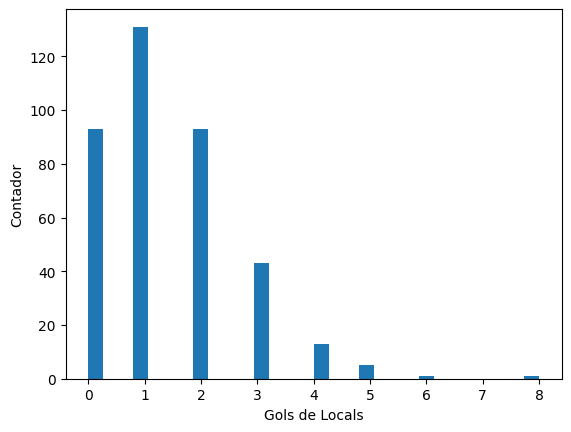

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(partits["home_team_goal_count"], bins=30)
plt.ylabel('Contador')
plt.xlabel('Gols de Locals')

Text(0.5, 0, 'Gols de visitants')

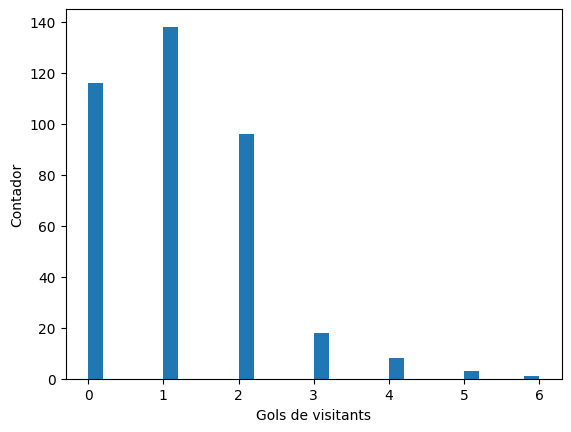

In [14]:
plt.hist(partits["away_team_goal_count"], bins=30)
plt.ylabel('Contador')
plt.xlabel('Gols de visitants')

Text(0.5, 0, 'resultat del partit')

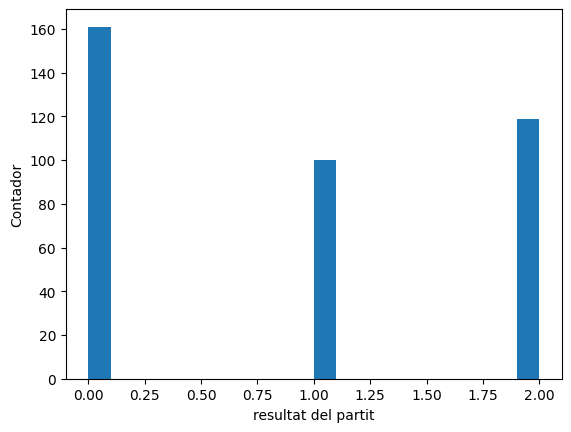

In [15]:
plt.hist(partits["result"], bins=20)
plt.ylabel('Contador')
plt.xlabel('resultat del partit')

In [16]:
train=partits[partits["Game Week"]<20]
test=partits[partits["Game Week"]>19]
predictors=["home_team_code", "away_team_code", "referee_code", "day_code", "hour", "Pre-Match PPG (Home)", "Pre-Match PPG (Away)", "Home Team Pre-Match xG", "Away Team Pre-Match xG", "average_goals_per_match_pre_match", "btts_percentage_pre_match", "btts_percentage_pre_match", "average_corners_per_match_pre_match", "average_cards_per_match_pre_match" ]
#predictors=sorted(partits.select_dtypes(include=["int64", "float64"]))

#Primers models

##Tot 0

In [17]:
from sklearn.metrics import accuracy_score
tot_0=np.zeros(len(test["result"]))
encert_result_tot0 = accuracy_score(test["result"], tot_0, normalize=True)
print(encert_result_tot0)

0.4263157894736842


## Creació del model (TotallyRandom)

In [18]:
import numpy as np
random_results= np.random.choice([0,1, 2], size=len(partits['result']))

In [19]:
encert_result_random = accuracy_score(partits["result"], random_results, normalize=True)
print(encert_result_random)

0.3394736842105263


## Creació del model (LinearRegression)



In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [21]:
lr_result=LinearRegression()
lr_result.fit(train[predictors], train["result"])

LinearRegression()

In [22]:
from sklearn.metrics import mean_squared_error
predic_result_lr=lr_result.predict(test[predictors])
encert_result_lr=1-mean_squared_error(test["result"], predic_result_lr)
print(encert_result_lr)

0.33993223486258695


##Creació del model (RandomForest)

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rf_result= RandomForestClassifier(random_state=1)

In [25]:
rf_result.fit(train[predictors], train["result"])

RandomForestClassifier(random_state=1)

In [26]:
predic_result_rf=rf_result.predict(test[predictors])


In [27]:
encert_result_rf = accuracy_score(test["result"], predic_result_rf, normalize=True)
print(encert_result_rf)

0.4473684210526316


In [28]:
len(predic_result_rf)

190

## Creació del model (XGBoost)

In [29]:
pip install --upgrade xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 3.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

In [30]:
from xgboost import XGBClassifier

In [31]:
bst_result = XGBClassifier(objective='multi:softmax', num_class=3)
bst_result.fit(train[predictors].to_numpy(), train["result"])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [32]:
predic_result_bst=bst_result.predict(test[predictors].to_numpy())
encert_result_bst=accuracy_score(test["result"], predic_result_bst, normalize=True)
print(encert_result_bst)

0.4263157894736842


##Comparació entre models

Text(0.5, 1.0, 'Comparació dels diferents models base')

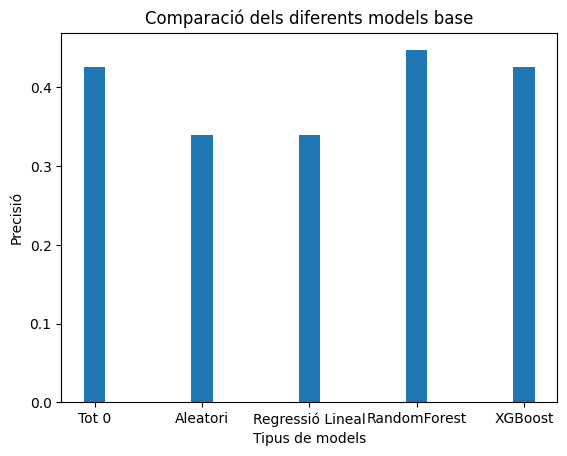

In [33]:
encerts=[encert_result_tot0, encert_result_random, encert_result_lr, encert_result_rf, encert_result_bst]
models=["Tot 0", "Aleatori", "Regressió Lineal", "RandomForest", "XGBoost"]
plt.bar(models, encerts, width=0.2)
plt.ylabel('Precisió')
plt.xlabel('Tipus de models')
plt.title("Comparació dels diferents models base")

#Tuning dels models inicials

##Tuning del Linar Regression

###Aplicació

In [34]:
lr_result_tuned=LinearRegression(fit_intercept=True, copy_X=True,n_jobs=-1, positive=False)
lr_result_tuned.fit(train[predictors], train["result"])

LinearRegression(n_jobs=-1)

In [35]:
predic_result_lr_tuned=lr_result_tuned.predict(test[predictors])
encert_result_lr_tuned=1-mean_squared_error(test["result"], predic_result_lr_tuned)
print(encert_result_lr_tuned)

0.33993223486258695


Text(0.5, 1.0, 'Comparació entre el model de regressió lineal base i tunejat')

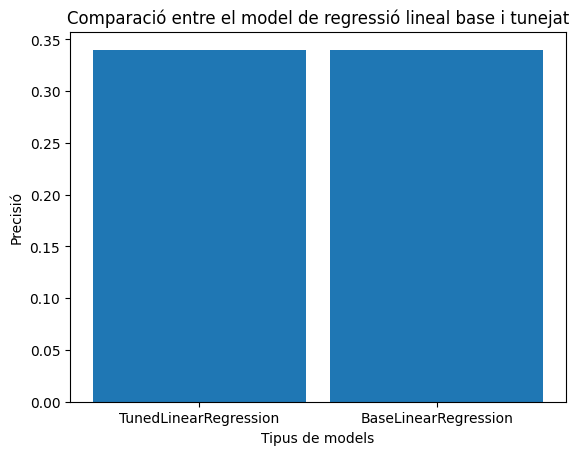

In [36]:
encerts_lr=[encert_result_lr_tuned, encert_result_lr]
models_lr=["TunedLinearRegression", "BaseLinearRegression"]
plt.bar(models_lr, encerts_lr, width=0.9)
plt.ylabel("Precisió")
plt.xlabel("Tipus de models")
plt.title("Comparació entre el model de regressió lineal base i tunejat")

## Tuning del RandomForest


###GridSearch


In [39]:
from sklearn.model_selection import GridSearchCV
search_space_rf={
    "n_estimators":[10,100,1000],
    "min_samples_split":[2,5,10],
    "max_features":[None, "sqrt", "log2"],
    "max_samples":[0.1, 0.5, 1.0],
    "random_state":[1]
}

In [40]:
grid_rf=GridSearchCV(estimator=rf_result, param_grid=search_space_rf, cv=5, error_score="raise")
grid_rf.fit(train[predictors], train["result"])

GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_features': [None, 'sqrt', 'log2'],
                         'max_samples': [0.1, 0.5, 1.0],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 100, 1000], 'random_state': [1]})

In [41]:
print(grid_rf.best_params_)

{'max_features': None, 'max_samples': 0.1, 'min_samples_split': 2, 'n_estimators': 1000, 'random_state': 1}


In [42]:
print(grid_rf.best_estimator_)

RandomForestClassifier(max_features=None, max_samples=0.1, n_estimators=1000,
                       random_state=1)


In [43]:
print(grid_rf.best_score_)

0.4947368421052631


###Aplicació

In [60]:
rf_result_tuned= RandomForestClassifier(n_estimators=1000, min_samples_split=2, max_features=None, random_state=1, bootstrap=True, max_samples=0.1)

In [61]:
rf_result_tuned.fit(train[predictors], train["result"])

RandomForestClassifier(max_features=None, max_samples=0.1, n_estimators=1000,
                       random_state=1)

In [62]:
predic_result_rf_tuned=rf_result_tuned.predict(test[predictors])

In [63]:
encert_result_rf_tuned = accuracy_score(test["result"], predic_result_rf_tuned, normalize=True)
print(encert_result_rf_tuned)

0.46842105263157896


Text(0.5, 1.0, 'Comparació entre el model RandomForest base i tunejat')

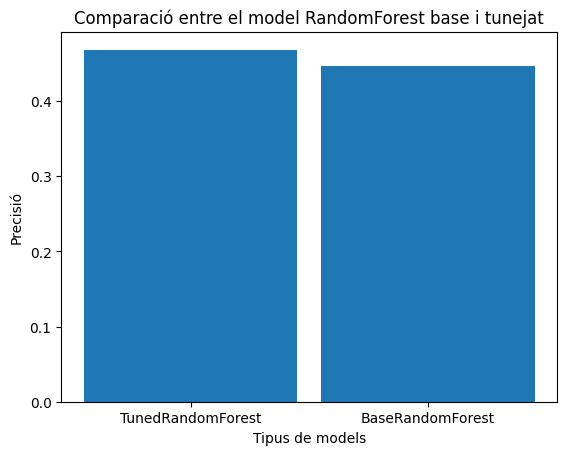

In [64]:
encerts_rf=[encert_result_rf_tuned, encert_result_rf]
models_rf=["TunedRandomForest", "BaseRandomForest"]
plt.bar(models_rf, encerts_rf, width=0.9)
plt.ylabel('Precisió')
plt.xlabel('Tipus de models')
plt.title("Comparació entre el model RandomForest base i tunejat")

In [65]:
print(predic_result_rf_tuned)

[0 0 2 2 0 0 0 0 0 0 0 0 2 2 2 0 0 2 0 2 0 0 2 2 0 0 0 0 2 2 2 2 0 0 0 0 2
 2 0 1 2 0 2 2 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 2 2 0 0 0 0 0 0 2
 0 2 0 2 2 0 2 0 0 0 2 0 0 0 0 2 2 2 0 0 0 0 2 0 2 2 2 2 2 0 0 2 2 2 0 0 2
 2 0 2 0 1 0 0 0 0 2 0 0 2 0 0 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 0 0 2 2 0 2 0 2 2 0 2 2 2 0 0 0 2 0 2 0 2 2 2 2 0 0 0 2 0 0 0 2 2 0 2 0
 0 0 2 0 0]


##Tuning del XGBoost

###GridSearch

In [50]:
search_space_bst={
    "objective":["multi:softmax"],
    "num_class":[3],
    "max_depth":[10,20,30],
    "subsample":[0.1,0.4,0.5,0.7,1],
    "colsample_bylevel":[0.1,0.5,0.7,1],
    "colsample_bytree":[0.1,0.5,0.7,1],
    "min_child_weight":[30,50,70],
    "n_estimators":[100,500,1000],
    "learning_rate":[0.01,0.1],
    "random_state":[1]
}

In [51]:
grid_bst=GridSearchCV(estimator=bst_result, param_grid=search_space_bst, cv=5, error_score="raise")
grid_bst.fit(train[predictors].to_numpy(), train["result"])

GridSearchCV(cv=5, error_score='raise',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None...
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=3,
                                     num_parallel_tree=None, ...),
             param_grid={'colsample_bylevel': [0.1, 0.5, 0.7, 1],
                         'colsample_bytree': [0.1, 0.5, 0.7, 1],
                         'learning_rate': [0.01, 0.1],
                         'max_depth': [10, 20, 30],
                         'min_child_weight': [30, 50, 70],
                         'n_estimators': [100, 500, 1000], 'num_class': [3],
                         'objective': ['multi:softmax'], 'random_state': [1],
                         'subsample': [0.1, 0.4, 0.5, 0.7, 1]})

In [52]:
print(grid_bst.best_params_)

{'colsample_bylevel': 0.5, 'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 10, 'min_child_weight': 30, 'n_estimators': 500, 'num_class': 3, 'objective': 'multi:softmax', 'random_state': 1, 'subsample': 1}


In [53]:
print(grid_bst.best_estimator_)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.5, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=30, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)


In [54]:
print(grid_bst.best_score_)

0.4789473684210527


###Aplicació

In [66]:
bst_result_tuned = XGBClassifier(objective="multi:softmax",
                                 num_class=3,
                                 max_depth=10,
                                 subsample=1,
                                 colsample_bylevel=0.5,
                                 colsample_bytree=0.5,
                                 min_child_weight=30,
                                 n_estimators=500,
                                 learning_rate=0.01,
                                 random_state=1
                                 )
bst_result_tuned.fit(train[predictors].to_numpy(), train["result"])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.5, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=30, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [67]:
predic_result_bst_tuned=bst_result_tuned.predict(test[predictors].to_numpy())
encert_result_bst_tuned=accuracy_score(test["result"], predic_result_bst_tuned, normalize=True)
print(encert_result_bst_tuned)

0.47368421052631576


Text(0.5, 1.0, 'Comparació entre el model XGBoost base i tunejat')

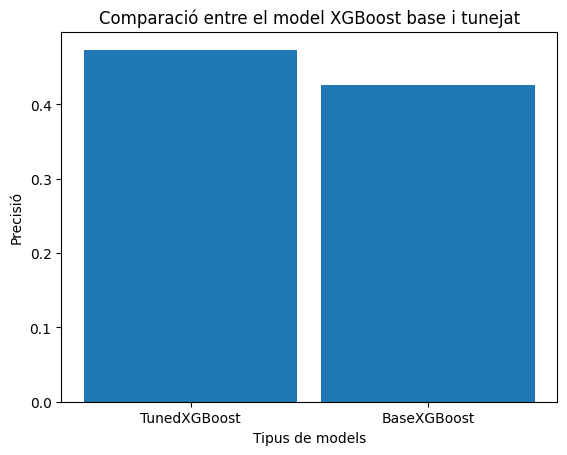

In [68]:
models_bst=["TunedXGBoost", "BaseXGBoost"]
encerts_bst=[encert_result_bst_tuned, encert_result_bst]
plt.bar(models_bst, encerts_bst, width=0.9)
plt.ylabel('Precisió')
plt.xlabel('Tipus de models')
plt.title("Comparació entre el model XGBoost base i tunejat")

In [69]:
print(predic_result_bst_tuned)

[0 0 2 2 0 0 0 0 0 0 0 0 2 2 2 0 0 2 0 2 0 0 2 2 0 0 0 0 0 2 2 2 0 0 0 0 2
 2 0 1 0 0 2 2 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 2 2 0 2 0 0 0 0 0 0 0 0 0 2
 2 2 0 2 2 0 2 0 0 2 2 0 0 0 0 2 2 2 0 0 0 0 2 0 2 2 0 2 2 0 0 0 0 2 0 0 2
 2 2 2 2 0 2 0 0 0 0 2 0 2 0 0 0 0 0 2 0 0 2 2 2 0 2 0 0 0 0 0 0 0 2 0 0 0
 0 0 0 2 2 0 2 0 2 2 0 2 2 0 0 0 0 0 0 2 0 2 2 2 2 0 0 0 2 0 0 0 1 2 0 2 0
 0 0 0 0 2]


##Comparació entre models tunejats


Text(0.5, 1.0, 'Precisió dels models tunejats')

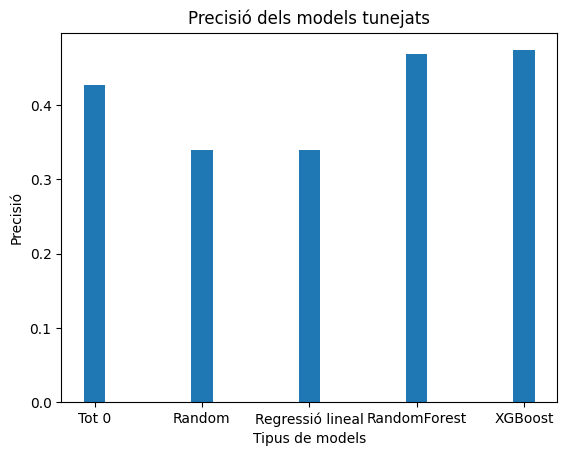

In [70]:
encert_tuned=[encert_result_tot0, encert_result_random, encert_result_lr_tuned, encert_result_rf_tuned, encert_result_bst_tuned]
models_tuned=["Tot 0", "Random", "Regressió lineal", "RandomForest", "XGBoost"]
plt.bar(models_tuned, encert_tuned, width=0.2)
plt.ylabel('Precisió')
plt.xlabel('Tipus de models')
plt.title("Precisió dels models tunejats")

#Feature Engineering

In [71]:
partits.head()

,date_GMT,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,home_team_goal_count,...,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,home_team_code,away_team_code,referee_code,day_code,hour,result
timestamp,,,,,,,,,,,,,,,,,,,,,
1660408200,2022-08-13 16:30:00,AC Milan,Udinese,Livio Marinelli,1.0,0.0,0.0,2.26,1.00,4,...,2.90,5.5,1.98,1.73,0,19,26,5,16,0
1660408200,2022-08-13 16:30:00,Sampdoria,Atalanta,Federico Dionisi,1.0,0.0,0.0,0.53,1.63,0,...,2.70,5.0,1.62,2.20,15,1,15,5,16,2
1660416300,2022-08-13 18:45:00,Lecce,Inter Milan,Alessandro Prontera,1.0,0.0,0.0,0.89,1.58,1,...,2.55,4.5,2.00,1.71,10,7,1,5,18,2
1660416300,2022-08-13 18:45:00,Monza,Torino,Maurizio Mariani,1.0,0.0,0.0,1.37,1.63,1,...,4.00,8.0,1.91,1.91,11,18,38,5,18,2
1660494600,2022-08-14 16:30:00,Fiorentina,Cremonese,Juan Luca Sacchi,1.0,0.0,0.0,1.74,0.58,3,...,2.73,5.0,1.95,1.80,5,3,25,6,16,0


In [72]:
punts_dict={}
prematch_points_home_team=[]
prematch_points_away_team=[]
for i, r in partits.iterrows():
  home_team=r["home_team_name"]
  away_team=r["away_team_name"]
  home_team_points=punts_dict.get(home_team,0)
  away_team_points=punts_dict.get(away_team,0)
  prematch_points_home_team.append(home_team_points)
  prematch_points_away_team.append(away_team_points)
  result = r.get('result', '')
  if result == 0:
    punts_dict[home_team] = home_team_points + 3
  elif result == 1:
    punts_dict[home_team] = home_team_points + 1
    punts_dict[away_team] = away_team_points + 1
  elif result == 2:
    punts_dict[away_team] = away_team_points + 3
partits['prematch_points_home_team'] = prematch_points_home_team
partits['prematch_points_away_team'] = prematch_points_away_team


In [73]:
partits.tail()

,date_GMT,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,home_team_goal_count,...,odds_btts_yes,odds_btts_no,home_team_code,away_team_code,referee_code,day_code,hour,result,prematch_points_home_team,prematch_points_away_team
timestamp,,,,,,,,,,,,,,,,,,,,,
1685905200,2023-06-04 19:00:00,Atalanta,Monza,Marco Di Bello,38.0,1.67,1.44,1.74,1.37,5,...,1.62,2.30,1,11,31,6,19,0,61,52
1685905200,2023-06-04 19:00:00,Roma,Spezia,Fabio Maresca,38.0,1.83,0.61,1.89,0.58,2,...,1.78,2.00,13,17,14,6,19,0,60,31
1685905200,2023-06-04 19:00:00,Lecce,Bologna,Marco Piccinini,38.0,0.94,1.17,0.89,1.26,2,...,1.72,2.10,10,2,33,6,19,2,36,51
1685905200,2023-06-04 19:00:00,AC Milan,Hellas Verona,Paolo Valeri,38.0,2.22,0.56,2.26,0.65,3,...,1.83,1.98,0,6,41,6,19,0,67,31
1685905200,2023-06-04 19:00:00,Udinese,Juventus,Marco Guida,38.0,1.50,1.50,1.42,1.58,0,...,1.81,1.95,19,8,32,6,19,2,46,69


In [74]:
vermelles_dict={}
prematch_cards_home_team=[]
prematch_cards_away_team=[]
for i, r in partits.iterrows():
  home_team=r["home_team_name"]
  away_team=r["away_team_name"]
  home_team_cards=vermelles_dict.get(home_team,0)
  away_team_cards=vermelles_dict.get(away_team,0)
  prematch_cards_home_team.append(home_team_cards)
  prematch_cards_away_team.append(away_team_cards)
  vermelles_dict[home_team]=r.get("home_team_red_cards", "")
  vermelles_dict[away_team]=r.get("away_team_red_cards", "")
partits["Sanctioned_players_home_team"]=prematch_cards_home_team
partits["Sanctioned_players_away_team"]=prematch_cards_away_team


In [75]:
partits.head(20)

,date_GMT,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,home_team_goal_count,...,home_team_code,away_team_code,referee_code,day_code,hour,result,prematch_points_home_team,prematch_points_away_team,Sanctioned_players_home_team,Sanctioned_players_away_team
timestamp,,,,,,,,,,,,,,,,,,,,,
1660408200,2022-08-13 16:30:00,AC Milan,Udinese,Livio Marinelli,1.0,0.0,0.0,2.26,1.00,4,...,0,19,26,5,16,0,0,0,0,0
1660408200,2022-08-13 16:30:00,Sampdoria,Atalanta,Federico Dionisi,1.0,0.0,0.0,0.53,1.63,0,...,15,1,15,5,16,2,0,0,0,0
1660416300,2022-08-13 18:45:00,Lecce,Inter Milan,Alessandro Prontera,1.0,0.0,0.0,0.89,1.58,1,...,10,7,1,5,18,2,0,0,0,0
1660416300,2022-08-13 18:45:00,Monza,Torino,Maurizio Mariani,1.0,0.0,0.0,1.37,1.63,1,...,11,18,38,5,18,2,0,0,0,0
1660494600,2022-08-14 16:30:00,Fiorentina,Cremonese,Juan Luca Sacchi,1.0,0.0,0.0,1.74,0.58,3,...,5,3,25,6,16,0,0,0,0,0
1660494600,2022-08-14 16:30:00,Lazio,Bologna,Luca Massimi,1.0,0.0,0.0,1.95,1.26,2,...,9,2,27,6,16,0,0,0,0,0
1660502700,2022-08-14 18:45:00,Salernitana,Roma,Simone Sozza,1.0,0.0,0.0,1.42,1.42,0,...,14,13,43,6,18,2,0,0,0,0
1660502700,2022-08-14 18:45:00,Spezia,Empoli,Daniele Chiffi,1.0,0.0,0.0,1.00,0.79,1,...,17,4,5,6,18,0,0,0,0,0
1660581000,2022-08-15 16:30:00,Hellas Verona,Napoli,Michael Fabbri,1.0,0.0,0.0,1.11,2.37,2,...,6,12,39,0,16,2,0,0,0,0


In [76]:
possession_dict={}
total_possession_dict={}
average_possession_home_team=[]
average_possession_away_team=[]
contador=1
contador_partits=1
for i, r in partits.iterrows():
  home_team=r["home_team_name"]
  away_team=r["away_team_name"]
  if home_team not in total_possession_dict:
    total_possession_dict[home_team] = 0
  if away_team not in total_possession_dict:
    total_possession_dict[away_team] = 0
  home_team_possession=possession_dict.get(home_team,0)
  away_team_possession=possession_dict.get(away_team,0)
  home_team_total_possession=total_possession_dict.get(home_team,0)
  away_team_total_possession=total_possession_dict.get(away_team,0)
  average_possession_home_team.append(home_team_possession)
  average_possession_away_team.append(away_team_possession)
  total_possession_dict[home_team]=total_possession_dict[home_team]+r.get("home_team_possession", "")
  total_possession_dict[away_team]=total_possession_dict[away_team]+r.get("away_team_possession", "")
  possession_dict[home_team]=total_possession_dict[home_team]/contador_partits
  possession_dict[away_team]=total_possession_dict[away_team]/contador_partits
  contador=contador+1
  if contador==11:
    contador_partits=contador_partits+1
    contador=1
partits["average_possession_home_team"]=average_possession_home_team
partits["average_possession_away_team"]=average_possession_away_team
partits.tail()

,date_GMT,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,home_team_goal_count,...,referee_code,day_code,hour,result,prematch_points_home_team,prematch_points_away_team,Sanctioned_players_home_team,Sanctioned_players_away_team,average_possession_home_team,average_possession_away_team
timestamp,,,,,,,,,,,,,,,,,,,,,
1685905200,2023-06-04 19:00:00,Atalanta,Monza,Marco Di Bello,38.0,1.67,1.44,1.74,1.37,5,...,31,6,19,0,61,52,0,1,50.081081,55.270270
1685905200,2023-06-04 19:00:00,Roma,Spezia,Fabio Maresca,38.0,1.83,0.61,1.89,0.58,2,...,14,6,19,0,60,31,0,0,47.513514,47.756757
1685905200,2023-06-04 19:00:00,Lecce,Bologna,Marco Piccinini,38.0,0.94,1.17,0.89,1.26,2,...,33,6,19,2,36,51,0,0,41.243243,54.945946
1685905200,2023-06-04 19:00:00,AC Milan,Hellas Verona,Paolo Valeri,38.0,2.22,0.56,2.26,0.65,3,...,41,6,19,0,67,31,0,0,55.108108,41.513514
1685905200,2023-06-04 19:00:00,Udinese,Juventus,Marco Guida,38.0,1.50,1.50,1.42,1.58,0,...,32,6,19,2,46,69,1,0,48.000000,49.513514


In [77]:
fouls_dict={}
total_fouls_dict={}
average_fouls_home_team=[]
average_fouls_away_team=[]
contador=1
contador_partits=1
for i, r in partits.iterrows():
  home_team=r["home_team_name"]
  away_team=r["away_team_name"]
  if home_team not in total_fouls_dict:
    total_fouls_dict[home_team] = 0
  if away_team not in total_fouls_dict:
    total_fouls_dict[away_team] = 0
  home_team_fouls=fouls_dict.get(home_team,0)
  away_team_fouls=fouls_dict.get(away_team,0)
  home_team_total_fouls=total_fouls_dict.get(home_team,0)
  away_team_total_fouls=total_fouls_dict.get(away_team,0)
  average_fouls_home_team.append(home_team_fouls)
  average_fouls_away_team.append(away_team_fouls)
  total_fouls_dict[home_team]=total_fouls_dict[home_team]+r.get("home_team_fouls", "")
  total_fouls_dict[away_team]=total_fouls_dict[away_team]+r.get("away_team_fouls", "")
  fouls_dict[home_team]=total_fouls_dict[home_team]/contador_partits
  fouls_dict[away_team]=total_fouls_dict[away_team]/contador_partits
  contador=contador+1
  if contador==11:
    contador_partits=contador_partits+1
    contador=1
partits["average_fouls_home_team"]=average_fouls_home_team
partits["average_fouls_away_team"]=average_fouls_away_team
partits.head(20)

,date_GMT,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,home_team_goal_count,...,hour,result,prematch_points_home_team,prematch_points_away_team,Sanctioned_players_home_team,Sanctioned_players_away_team,average_possession_home_team,average_possession_away_team,average_fouls_home_team,average_fouls_away_team
timestamp,,,,,,,,,,,,,,,,,,,,,
1660408200,2022-08-13 16:30:00,AC Milan,Udinese,Livio Marinelli,1.0,0.0,0.0,2.26,1.00,4,...,16,0,0,0,0,0,0.0,0.0,0.0,0.0
1660408200,2022-08-13 16:30:00,Sampdoria,Atalanta,Federico Dionisi,1.0,0.0,0.0,0.53,1.63,0,...,16,2,0,0,0,0,0.0,0.0,0.0,0.0
1660416300,2022-08-13 18:45:00,Lecce,Inter Milan,Alessandro Prontera,1.0,0.0,0.0,0.89,1.58,1,...,18,2,0,0,0,0,0.0,0.0,0.0,0.0
1660416300,2022-08-13 18:45:00,Monza,Torino,Maurizio Mariani,1.0,0.0,0.0,1.37,1.63,1,...,18,2,0,0,0,0,0.0,0.0,0.0,0.0
1660494600,2022-08-14 16:30:00,Fiorentina,Cremonese,Juan Luca Sacchi,1.0,0.0,0.0,1.74,0.58,3,...,16,0,0,0,0,0,0.0,0.0,0.0,0.0
1660494600,2022-08-14 16:30:00,Lazio,Bologna,Luca Massimi,1.0,0.0,0.0,1.95,1.26,2,...,16,0,0,0,0,0,0.0,0.0,0.0,0.0
1660502700,2022-08-14 18:45:00,Salernitana,Roma,Simone Sozza,1.0,0.0,0.0,1.42,1.42,0,...,18,2,0,0,0,0,0.0,0.0,0.0,0.0
1660502700,2022-08-14 18:45:00,Spezia,Empoli,Daniele Chiffi,1.0,0.0,0.0,1.00,0.79,1,...,18,0,0,0,0,0,0.0,0.0,0.0,0.0
1660581000,2022-08-15 16:30:00,Hellas Verona,Napoli,Michael Fabbri,1.0,0.0,0.0,1.11,2.37,2,...,16,2,0,0,0,0,0.0,0.0,0.0,0.0


In [78]:
shots_dict={}
total_shots_dict={}
average_shots_home_team=[]
average_shots_away_team=[]
contador=1
contador_partits=1
for i, r in partits.iterrows():
  home_team=r["home_team_name"]
  away_team=r["away_team_name"]
  if home_team not in total_shots_dict:
    total_shots_dict[home_team] = 0
  if away_team not in total_shots_dict:
    total_shots_dict[away_team] = 0
  home_team_shots=shots_dict.get(home_team,0)
  away_team_shots=shots_dict.get(away_team,0)
  home_team_total_shots=total_shots_dict.get(home_team,0)
  away_team_total_shots=total_shots_dict.get(away_team,0)
  average_shots_home_team.append(home_team_shots)
  average_shots_away_team.append(away_team_shots)
  total_shots_dict[home_team]=total_shots_dict[home_team]+r.get("home_team_shots", "")
  total_shots_dict[away_team]=total_shots_dict[away_team]+r.get("away_team_shots", "")
  shots_dict[home_team]=total_shots_dict[home_team]/contador_partits
  shots_dict[away_team]=total_shots_dict[away_team]/contador_partits
  contador=contador+1
  if contador==11:
    contador_partits=contador_partits+1
    contador=1
partits["average_shots_home_team"]=average_shots_home_team
partits["average_shots_away_team"]=average_shots_away_team
partits.head(20)

,date_GMT,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,home_team_goal_count,...,prematch_points_home_team,prematch_points_away_team,Sanctioned_players_home_team,Sanctioned_players_away_team,average_possession_home_team,average_possession_away_team,average_fouls_home_team,average_fouls_away_team,average_shots_home_team,average_shots_away_team
timestamp,,,,,,,,,,,,,,,,,,,,,
1660408200,2022-08-13 16:30:00,AC Milan,Udinese,Livio Marinelli,1.0,0.0,0.0,2.26,1.00,4,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1660408200,2022-08-13 16:30:00,Sampdoria,Atalanta,Federico Dionisi,1.0,0.0,0.0,0.53,1.63,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1660416300,2022-08-13 18:45:00,Lecce,Inter Milan,Alessandro Prontera,1.0,0.0,0.0,0.89,1.58,1,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1660416300,2022-08-13 18:45:00,Monza,Torino,Maurizio Mariani,1.0,0.0,0.0,1.37,1.63,1,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1660494600,2022-08-14 16:30:00,Fiorentina,Cremonese,Juan Luca Sacchi,1.0,0.0,0.0,1.74,0.58,3,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1660494600,2022-08-14 16:30:00,Lazio,Bologna,Luca Massimi,1.0,0.0,0.0,1.95,1.26,2,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1660502700,2022-08-14 18:45:00,Salernitana,Roma,Simone Sozza,1.0,0.0,0.0,1.42,1.42,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1660502700,2022-08-14 18:45:00,Spezia,Empoli,Daniele Chiffi,1.0,0.0,0.0,1.00,0.79,1,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1660581000,2022-08-15 16:30:00,Hellas Verona,Napoli,Michael Fabbri,1.0,0.0,0.0,1.11,2.37,2,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
shots_ontarget_dict={}
total_shots_ontarget_dict={}
average_shots_ontarget_home_team=[]
average_shots_ontarget_away_team=[]
contador=1
contador_partits=1
for i, r in partits.iterrows():
  home_team=r["home_team_name"]
  away_team=r["away_team_name"]
  if home_team not in total_shots_ontarget_dict:
    total_shots_ontarget_dict[home_team] = 0
  if away_team not in total_shots_ontarget_dict:
    total_shots_ontarget_dict[away_team] = 0
  home_team_shots_ontarget=shots_ontarget_dict.get(home_team,0)
  away_team_shots_ontarget=shots_ontarget_dict.get(away_team,0)
  home_team_total_shots_ontarget=total_shots_ontarget_dict.get(home_team,0)
  away_team_total_shots_ontarget=total_shots_ontarget_dict.get(away_team,0)
  average_shots_ontarget_home_team.append(home_team_shots_ontarget)
  average_shots_ontarget_away_team.append(away_team_shots_ontarget)
  total_shots_ontarget_dict[home_team]=total_shots_ontarget_dict[home_team]+r.get("home_team_shots_on_target", "")
  total_shots_ontarget_dict[away_team]=total_shots_ontarget_dict[away_team]+r.get("away_team_shots_on_target", "")
  shots_ontarget_dict[home_team]=total_shots_ontarget_dict[home_team]/contador_partits
  shots_ontarget_dict[away_team]=total_shots_ontarget_dict[away_team]/contador_partits
  contador=contador+1
  if contador==11:
    contador_partits=contador_partits+1
    contador=1
partits["average_shots_ontarget_home_team"]=average_shots_ontarget_home_team
partits["average_shots_ontarget_away_team"]=average_shots_ontarget_away_team
partits.head(20)

,date_GMT,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,home_team_goal_count,...,Sanctioned_players_home_team,Sanctioned_players_away_team,average_possession_home_team,average_possession_away_team,average_fouls_home_team,average_fouls_away_team,average_shots_home_team,average_shots_away_team,average_shots_ontarget_home_team,average_shots_ontarget_away_team
timestamp,,,,,,,,,,,,,,,,,,,,,
1660408200,2022-08-13 16:30:00,AC Milan,Udinese,Livio Marinelli,1.0,0.0,0.0,2.26,1.00,4,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1660408200,2022-08-13 16:30:00,Sampdoria,Atalanta,Federico Dionisi,1.0,0.0,0.0,0.53,1.63,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1660416300,2022-08-13 18:45:00,Lecce,Inter Milan,Alessandro Prontera,1.0,0.0,0.0,0.89,1.58,1,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1660416300,2022-08-13 18:45:00,Monza,Torino,Maurizio Mariani,1.0,0.0,0.0,1.37,1.63,1,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1660494600,2022-08-14 16:30:00,Fiorentina,Cremonese,Juan Luca Sacchi,1.0,0.0,0.0,1.74,0.58,3,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1660494600,2022-08-14 16:30:00,Lazio,Bologna,Luca Massimi,1.0,0.0,0.0,1.95,1.26,2,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1660502700,2022-08-14 18:45:00,Salernitana,Roma,Simone Sozza,1.0,0.0,0.0,1.42,1.42,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1660502700,2022-08-14 18:45:00,Spezia,Empoli,Daniele Chiffi,1.0,0.0,0.0,1.00,0.79,1,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1660581000,2022-08-15 16:30:00,Hellas Verona,Napoli,Michael Fabbri,1.0,0.0,0.0,1.11,2.37,2,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
shots_offtarget_dict={}
total_shots_offtarget_dict={}
average_shots_offtarget_home_team=[]
average_shots_offtarget_away_team=[]
contador=1
contador_partits=1
for i, r in partits.iterrows():
  home_team=r["home_team_name"]
  away_team=r["away_team_name"]
  if home_team not in total_shots_offtarget_dict:
    total_shots_offtarget_dict[home_team] = 0
  if away_team not in total_shots_offtarget_dict:
    total_shots_offtarget_dict[away_team] = 0
  home_team_shots_offtarget=shots_offtarget_dict.get(home_team,0)
  away_team_shots_offtarget=shots_offtarget_dict.get(away_team,0)
  home_team_total_shots_offtarget=total_shots_offtarget_dict.get(home_team,0)
  away_team_total_shots_offtarget=total_shots_offtarget_dict.get(away_team,0)
  average_shots_offtarget_home_team.append(home_team_shots_offtarget)
  average_shots_offtarget_away_team.append(away_team_shots_offtarget)
  total_shots_offtarget_dict[home_team]=total_shots_offtarget_dict[home_team]+r.get("home_team_shots_off_target", "")
  total_shots_offtarget_dict[away_team]=total_shots_offtarget_dict[away_team]+r.get("away_team_shots_off_target", "")
  shots_offtarget_dict[home_team]=total_shots_offtarget_dict[home_team]/contador_partits
  shots_offtarget_dict[away_team]=total_shots_offtarget_dict[away_team]/contador_partits
  contador=contador+1
  if contador==11:
    contador_partits=contador_partits+1
    contador=1
partits["average_shots_offtarget_home_team"]=average_shots_offtarget_home_team
partits["average_shots_offtarget_away_team"]=average_shots_offtarget_away_team
partits.head(20)

,date_GMT,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,home_team_goal_count,...,average_possession_home_team,average_possession_away_team,average_fouls_home_team,average_fouls_away_team,average_shots_home_team,average_shots_away_team,average_shots_ontarget_home_team,average_shots_ontarget_away_team,average_shots_offtarget_home_team,average_shots_offtarget_away_team
timestamp,,,,,,,,,,,,,,,,,,,,,
1660408200,2022-08-13 16:30:00,AC Milan,Udinese,Livio Marinelli,1.0,0.0,0.0,2.26,1.00,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1660408200,2022-08-13 16:30:00,Sampdoria,Atalanta,Federico Dionisi,1.0,0.0,0.0,0.53,1.63,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1660416300,2022-08-13 18:45:00,Lecce,Inter Milan,Alessandro Prontera,1.0,0.0,0.0,0.89,1.58,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1660416300,2022-08-13 18:45:00,Monza,Torino,Maurizio Mariani,1.0,0.0,0.0,1.37,1.63,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1660494600,2022-08-14 16:30:00,Fiorentina,Cremonese,Juan Luca Sacchi,1.0,0.0,0.0,1.74,0.58,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1660494600,2022-08-14 16:30:00,Lazio,Bologna,Luca Massimi,1.0,0.0,0.0,1.95,1.26,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1660502700,2022-08-14 18:45:00,Salernitana,Roma,Simone Sozza,1.0,0.0,0.0,1.42,1.42,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1660502700,2022-08-14 18:45:00,Spezia,Empoli,Daniele Chiffi,1.0,0.0,0.0,1.00,0.79,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1660581000,2022-08-15 16:30:00,Hellas Verona,Napoli,Michael Fabbri,1.0,0.0,0.0,1.11,2.37,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
train_postfe=partits[partits["Game Week"]<20]
test_postfe=partits[partits["Game Week"]>19]
predictors_postfe=["home_team_code",
            "away_team_code",
            "referee_code",
            "day_code",
            "hour",
            "Pre-Match PPG (Home)",
            "Pre-Match PPG (Away)",
            "Home Team Pre-Match xG",
            "Away Team Pre-Match xG",
            "average_goals_per_match_pre_match",
            "btts_percentage_pre_match",
            "btts_percentage_pre_match",
            "average_corners_per_match_pre_match",
            "average_cards_per_match_pre_match",
            "prematch_points_home_team",
            "prematch_points_away_team",
            "Sanctioned_players_home_team",
            "Sanctioned_players_away_team",
            "average_possession_home_team",
            "average_possession_away_team",
            "average_fouls_home_team",
            "average_fouls_away_team",
            "average_shots_home_team",
            "average_shots_away_team",
            "average_shots_ontarget_home_team",
            "average_shots_ontarget_away_team",
            "average_shots_offtarget_home_team",
            "average_shots_offtarget_away_team"]

#Nous models amb el feature engineering

##Linear regression

###Aplicació

In [82]:
lr_result_tuned.fit(train_postfe[predictors_postfe], train_postfe["result"])

LinearRegression(n_jobs=-1)

In [83]:
predic_result_lr_tuned_postfe=lr_result_tuned.predict(test_postfe[predictors_postfe])
encert_result_lr_tuned_postfe=1-mean_squared_error(test_postfe["result"], predic_result_lr_tuned_postfe)
print(encert_result_lr_tuned_postfe)

0.27977324230521927


Text(0.5, 1.0, 'Comparació entre el model abans i després del feature engineering')

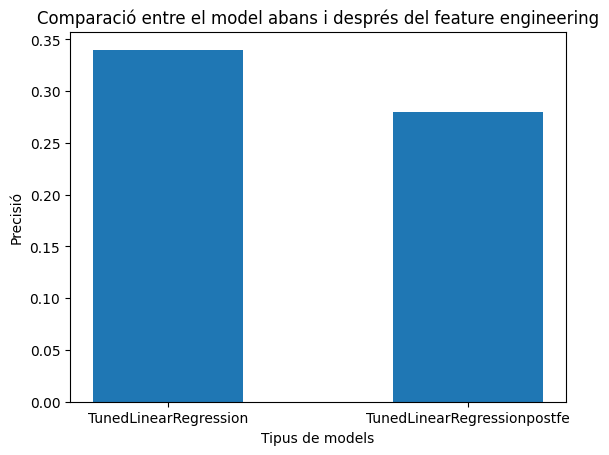

In [84]:
encerts_lr=[encert_result_lr_tuned, encert_result_lr_tuned_postfe]
models_lr=["TunedLinearRegression", "TunedLinearRegressionpostfe"]
plt.bar(models_lr, encerts_lr, width=0.5)
plt.ylabel("Precisió")
plt.xlabel("Tipus de models")
plt.title("Comparació entre el model abans i després del feature engineering")

##RandomForest


###GridSearch 1

In [85]:
from sklearn.model_selection import GridSearchCV
search_space_rf={
    "n_estimators":[10,100,1000],
    "min_samples_split":[2,5,10],
    "max_features":[None, "sqrt", "log2"],
    "max_samples":[0.25, 0.5, 1.0],
    "random_state":[1]
}

In [86]:
grid_rf_postfe=GridSearchCV(estimator=rf_result, param_grid=search_space_rf, cv=5, error_score="raise")
grid_rf_postfe.fit(train_postfe[predictors_postfe], train_postfe["result"])

GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_features': [None, 'sqrt', 'log2'],
                         'max_samples': [0.25, 0.5, 1.0],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 100, 1000], 'random_state': [1]})

In [87]:
print(grid_rf_postfe.best_params_)

{'max_features': None, 'max_samples': 0.25, 'min_samples_split': 5, 'n_estimators': 1000, 'random_state': 1}


In [88]:
print(grid_rf_postfe.best_estimator_)

RandomForestClassifier(max_features=None, max_samples=0.25, min_samples_split=5,
                       n_estimators=1000, random_state=1)


In [89]:
print(grid_rf_postfe.best_score_)

0.4894736842105263


###GridSearch 2

In [90]:
search_space_rf={
    "n_estimators":[750,1000,1250],
    "min_samples_split":[2,3,5,7],
    "max_features":[None, "sqrt", "log2"],
    "max_samples":[0.1, 0.25, 0.5],
    "random_state":[1]
}

In [91]:
grid_rf_postfe=GridSearchCV(estimator=rf_result, param_grid=search_space_rf, cv=5, error_score="raise")
grid_rf_postfe.fit(train_postfe[predictors_postfe], train_postfe["result"])

GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_features': [None, 'sqrt', 'log2'],
                         'max_samples': [0.1, 0.25, 0.5],
                         'min_samples_split': [2, 3, 5, 7],
                         'n_estimators': [750, 1000, 1250],
                         'random_state': [1]})

In [92]:
print(grid_rf_postfe.best_params_)

{'max_features': None, 'max_samples': 0.25, 'min_samples_split': 5, 'n_estimators': 750, 'random_state': 1}


In [93]:
print(grid_rf_postfe.best_estimator_)

RandomForestClassifier(max_features=None, max_samples=0.25, min_samples_split=5,
                       n_estimators=750, random_state=1)


In [94]:
print(grid_rf_postfe.best_score_)

0.5


###GridSearch 3

In [95]:
search_space_rf={
    "n_estimators":[600,750,900],
    "min_samples_split":[4,5,6],
    "max_features":[None, "sqrt", "log2"],
    "max_samples":[0.15,0.25,0.35],
    "random_state":[1]
}

In [96]:
grid_rf_postfe=GridSearchCV(estimator=rf_result, param_grid=search_space_rf, cv=5, error_score="raise")
grid_rf_postfe.fit(train_postfe[predictors_postfe], train_postfe["result"])

GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_features': [None, 'sqrt', 'log2'],
                         'max_samples': [0.15, 0.25, 0.35],
                         'min_samples_split': [4, 5, 6],
                         'n_estimators': [600, 750, 900], 'random_state': [1]})

In [97]:
print(grid_rf_postfe.best_params_)

{'max_features': None, 'max_samples': 0.25, 'min_samples_split': 4, 'n_estimators': 900, 'random_state': 1}


In [98]:
print(grid_rf_postfe.best_estimator_)

RandomForestClassifier(max_features=None, max_samples=0.25, min_samples_split=4,
                       n_estimators=900, random_state=1)


In [99]:
print(grid_rf_postfe.best_score_)

0.5105263157894736


###Aplicació

In [100]:
rf_result_tuned_postfe= RandomForestClassifier(n_estimators=900, min_samples_split=4, max_features=None, random_state=1, bootstrap=True, max_samples=0.25)
rf_result_tuned_postfe.fit(train_postfe[predictors_postfe], train_postfe["result"])

RandomForestClassifier(max_features=None, max_samples=0.25, min_samples_split=4,
                       n_estimators=900, random_state=1)

In [101]:
predic_result_rf_tuned_postfe_train=rf_result_tuned_postfe.predict(train_postfe[predictors_postfe])
encert_result_rf_tuned_postfe_train= accuracy_score(test_postfe["result"], predic_result_rf_tuned_postfe_train, normalize=True)
print(encert_result_rf_tuned_postfe_train)

0.3473684210526316


In [102]:
predic_result_rf_tuned_postfe=rf_result_tuned_postfe.predict(test_postfe[predictors_postfe])
encert_result_rf_tuned_postfe= accuracy_score(test_postfe["result"], predic_result_rf_tuned_postfe, normalize=True)
print(encert_result_rf_tuned_postfe)

0.4842105263157895


Text(0.5, 1.0, 'Comparació entre el model RandomForest abans i després del feature engineering')

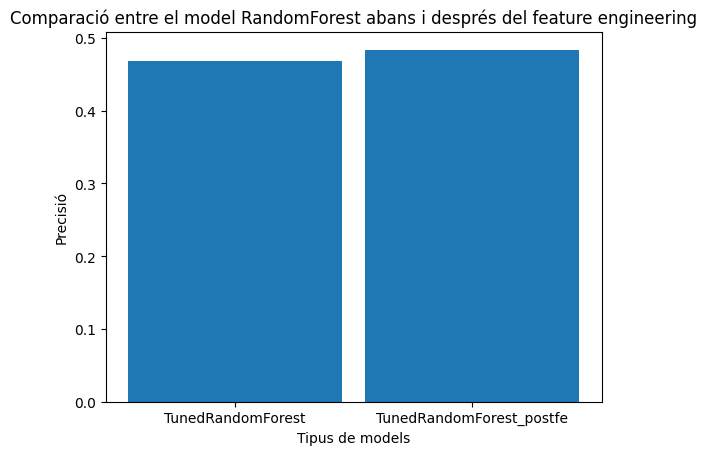

In [103]:
models_rf=["TunedRandomForest", "TunedRandomForest_postfe"]
encerts_rf=[encert_result_rf_tuned, encert_result_rf_tuned_postfe]
plt.bar(models_rf, encerts_rf, width=0.9)
plt.ylabel('Precisió')
plt.xlabel('Tipus de models')
plt.title("Comparació entre el model RandomForest abans i després del feature engineering")

In [104]:
print(predic_result_rf_tuned_postfe)

[0 0 2 2 0 0 0 0 0 0 0 0 2 2 2 0 0 2 0 2 0 0 2 0 0 2 0 0 2 2 2 2 1 0 0 0 2
 2 0 1 2 2 2 2 0 0 2 0 2 0 0 0 0 0 1 2 0 0 0 1 2 0 0 0 2 2 2 0 0 0 0 0 0 2
 1 2 0 2 0 0 2 0 0 0 0 2 0 0 0 2 2 2 0 2 0 0 1 2 2 0 2 2 2 0 0 2 2 2 0 0 2
 2 0 2 2 1 2 0 0 0 2 2 2 2 0 0 0 2 0 2 0 0 2 2 2 0 0 0 2 2 0 2 0 0 2 0 0 0
 0 2 0 2 2 0 2 0 2 0 0 2 2 2 0 0 2 2 0 2 0 2 2 2 2 0 0 2 2 0 0 0 2 2 0 2 0
 0 0 2 0 2]


##XGBoost

###GridSearch 1

In [105]:
search_space_bst={
    "objective":["multi:softmax"],
    "num_class":[3],
    "max_depth":[10,20,30],
    "subsample":[0.1,0.4,0.5,0.7,1],
    "colsample_bylevel":[0.1,0.5,0.7,1],
    "colsample_bytree":[0.1,0.5,0.7,1],
    "min_child_weight":[30,50,70],
    "n_estimators":[100,500,1000],
    "learning_rate":[0.01,0.1],
    "random_state":[1]
}

In [106]:
grid_bst_postfe=GridSearchCV(estimator=bst_result, param_grid=search_space_bst, cv=5, error_score="raise")
grid_bst_postfe.fit(train_postfe[predictors_postfe].to_numpy(), train_postfe["result"])

GridSearchCV(cv=5, error_score='raise',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None...
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=3,
                                     num_parallel_tree=None, ...),
             param_grid={'colsample_bylevel': [0.1, 0.5, 0.7, 1],
                         'colsample_bytree': [0.1, 0.5, 0.7, 1],
                         'learning_rate': [0.01, 0.1],
                         'max_depth': [10, 20, 30],
                         'min_child_weight': [30, 50, 70],
                         'n_estimators': [100, 500, 1000], 'num_class': [3],
                         'objective': ['multi:softmax'], 'random_state': [1],
                         'subsample': [0.1, 0.4, 0.5, 0.7, 1]})

In [107]:
print(grid_bst_postfe.best_params_)

{'colsample_bylevel': 0.5, 'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 30, 'n_estimators': 500, 'num_class': 3, 'objective': 'multi:softmax', 'random_state': 1, 'subsample': 1}


In [108]:
print(grid_bst_postfe.best_estimator_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.5, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=30, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)


In [109]:
print(grid_bst_postfe.best_score_)

0.4842105263157895


###GridSearch 2

In [110]:
search_space_bst={
    "objective":["multi:softmax"],
    "num_class":[3],
    "max_depth":[5,10,20],
    "subsample":[0.7,0.9,1],
    "colsample_bylevel":[0.3,0.5,0.7],
    "colsample_bytree":[0.6,0.7,0.8,0.9],
    "min_child_weight":[20,30,40],
    "n_estimators":[250,500,750],
    "learning_rate":[0.01,0.1],
    "random_state":[1]
}

In [111]:
grid_bst_postfe=GridSearchCV(estimator=bst_result, param_grid=search_space_bst, cv=5, error_score="raise")
grid_bst_postfe.fit(train_postfe[predictors_postfe].to_numpy(), train_postfe["result"])

GridSearchCV(cv=5, error_score='raise',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None...
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=3,
                                     num_parallel_tree=None, ...),
             param_grid={'colsample_bylevel': [0.3, 0.5, 0.7],
                         'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
                         'learning_rate': [0.01, 0.1], 'max_depth': [5, 10, 20],
                         'min_child_weight': [20, 30, 40],
                         'n_estimators': [250, 500, 750], 'num_class': [3],
                         'objective': ['multi:softmax'], 'random_state': [1],
                         'subsample': [0.7, 0.9, 1]})

In [112]:
print(grid_bst_postfe.best_params_)

{'colsample_bylevel': 0.3, 'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 20, 'n_estimators': 250, 'num_class': 3, 'objective': 'multi:softmax', 'random_state': 1, 'subsample': 1}


In [113]:
print(grid_bst_postfe.best_estimator_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.3, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=20, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)


In [114]:
print(grid_bst_postfe.best_score_)

0.5105263157894736


###GridSearch 3

In [115]:
search_space_bst={
    "objective":["multi:softmax"],
    "num_class":[3],
    "max_depth":[3,5,7],
    "subsample":[0.8,0.9,1],
    "colsample_bylevel":[0.2,0.3,0.4],
    "colsample_bytree":[0.5,0.6,0.7],
    "min_child_weight":[10,20,30],
    "n_estimators":[100,250,350],
    "learning_rate":[0.01,0.1],
    "random_state":[1]
}

In [116]:
grid_bst_postfe=GridSearchCV(estimator=bst_result, param_grid=search_space_bst, cv=5, error_score="raise")
grid_bst_postfe.fit(train_postfe[predictors_postfe].to_numpy(), train_postfe["result"])

GridSearchCV(cv=5, error_score='raise',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None...
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=3,
                                     num_parallel_tree=None, ...),
             param_grid={'colsample_bylevel': [0.2, 0.3, 0.4],
                         'colsample_bytree': [0.5, 0.6, 0.7],
                         'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 7],
                         'min_child_weight': [10, 20, 30],
                         'n_estimators': [100, 250, 350], 'num_class': [3],
                         'objective': ['multi:softmax'], 'random_state': [1],
                         'subsample': [0.8, 0.9, 1]})

In [117]:
print(grid_bst_postfe.best_params_)

{'colsample_bylevel': 0.4, 'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 20, 'n_estimators': 350, 'num_class': 3, 'objective': 'multi:softmax', 'random_state': 1, 'subsample': 1}


In [118]:
print(grid_bst_postfe.best_estimator_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.4, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=20, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=350, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)


In [119]:
print(grid_bst_postfe.best_score_)

0.5105263157894737


###Aplicació

In [120]:
bst_result_tuned_postfe = XGBClassifier(objective="multi:softmax",
                                 num_class=3,
                                 max_depth=3,
                                 subsample=1,
                                 colsample_bylevel=0.4,
                                 colsample_bytree=0.6,
                                 min_child_weight=20,
                                 n_estimators=350,
                                 learning_rate=0.1,
                                 random_state=1
                                 )
bst_result_tuned_postfe.fit(train_postfe[predictors_postfe].to_numpy(), train_postfe["result"])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.4, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=20, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=350, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [121]:
predic_result_bst_tuned_postfe_train=bst_result_tuned_postfe.predict(train_postfe[predictors_postfe].to_numpy())
encert_result_bst_tuned_postfe_train=accuracy_score(train_postfe["result"], predic_result_bst_tuned_postfe_train, normalize=True)
print(encert_result_bst_tuned_postfe_train)

0.868421052631579


In [122]:
predic_result_bst_tuned_postfe=bst_result_tuned_postfe.predict(test_postfe[predictors_postfe].to_numpy())
encert_result_bst_tuned_postfe=accuracy_score(test_postfe["result"], predic_result_bst_tuned_postfe, normalize=True)
print(encert_result_bst_tuned_postfe)

0.4473684210526316


In [123]:
print(predic_result_bst_tuned_postfe)

[0 2 2 2 0 0 0 1 0 0 2 0 2 2 1 0 0 2 0 2 2 2 1 1 1 2 0 0 0 2 2 2 1 0 0 0 2
 2 0 1 2 2 1 2 2 0 0 0 2 0 0 1 0 2 0 2 0 2 0 1 2 2 0 0 2 0 2 2 0 0 2 2 0 2
 2 2 0 2 1 0 0 0 0 1 2 2 2 0 2 2 2 2 0 1 0 0 2 2 1 1 0 2 1 0 0 2 0 2 0 0 2
 2 2 2 2 1 1 0 2 2 1 2 2 1 0 0 0 2 0 2 0 0 2 1 2 2 1 0 2 2 0 2 0 2 2 0 0 2
 2 2 0 2 2 0 2 0 2 2 0 2 2 0 0 0 2 1 0 2 0 2 2 1 2 2 0 2 2 0 0 0 2 2 0 2 0
 2 0 1 0 1]
